In [59]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from umap import UMAP
from scout.utils import read_csv
from scipy import stats
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.neighbors import NearestNeighbors

In [25]:
working_dir = '/data/datasets/organoid_phenotyping/datasets/'
folders = [f for f in os.listdir(working_dir) if os.path.isdir(os.path.join(working_dir, f))]
paths = [os.path.join(working_dir, f) for f in folders]
profiles = [np.load(os.path.join(p, 'cyto_profiles_sample.npy')) for p in paths]
org_labels = np.concatenate([i * np.ones(len(p)) for i, p in enumerate(all_profiles)]).astype(np.int)
f'Looking at {len(paths)} whole org datasets'

'Looking at 42 whole org datasets'

In [27]:
profiles = np.concatenate(all_profiles)
profiles.shape

(209170, 3, 6)

In [29]:
X = profiles.reshape((len(profiles), -1))
X.shape

(209170, 18)

In [30]:
umap = UMAP().fit(X)
umap

/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/umap/rp_tree.py:450: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "make_euclidean_tree" failed type inference due to: Cannot unify RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none) and RandomProjectionTreeNode(none, bool, array(float32, 1d, C), float64, RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none), RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none)) for '$14.16', defined at /home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/umap/rp_tree.py (457)

File "../../.conda/envs/scout/lib/python3.6/site-packages/umap/rp_tree.py", line 457:
def make_euclidean_tree(data, indices, rng_state, leaf_size=30):
    <source elided>

        left_node = make_euclidean_tree(data, left_indices, rng_state, leaf_size)
        ^

[1] During: resolving callee type: recursive(type(CPUDispatcher(<function make

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=15, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=False)

In [31]:
X_embed = umap.transform(X)
X_embed.shape

(209170, 2)

In [72]:
n = 50_000

i = np.arange(len(X))
np.random.shuffle(i)
i = i[:n]
X_sample = X_embed[i, :]
X_sample.shape

(50000, 2)

<IPython.core.display.Javascript object>


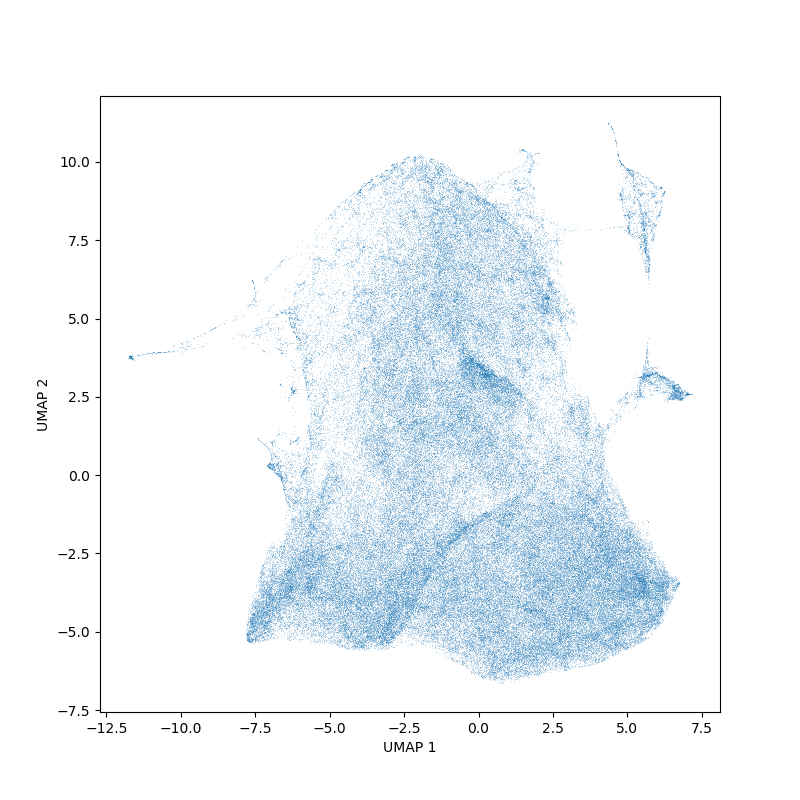

In [75]:
plt.figure(figsize=(8, 8))
plt.plot(X_embed[:, 0], X_embed[:, 1], ',', alpha=0.2)
# sns.kdeplot(X_sample[:, 0], X_sample[:, 1])
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

In [63]:
class_labels = np.zeros(len(X), np.int)

<IPython.core.display.Javascript object>


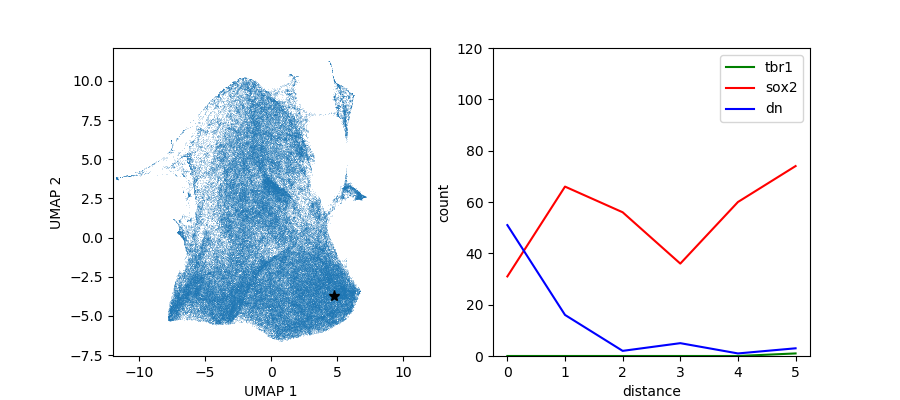

interactive(children=(FloatSlider(value=0.0, description='x', max=12.0, min=-12.0, step=0.05), FloatSlider(val…

In [77]:
%matplotlib notebook

x = -6
y = 4

min_val = -12
max_val = 12

embedding = X_embed

fig = plt.figure(figsize=(9, 4))

ax0 = plt.subplot(121)
for i in range(class_labels.max() + 1):
    idx = np.where(class_labels == i)[0]
    plt.plot(embedding[idx, 0], embedding[idx, 1], ',', alpha=0.2)
line, = plt.plot(x, y, 'k*', markersize=8)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.xlim([min_val, max_val])

ax1 = plt.subplot(122)
ax1.set_ylim([0, 120])

nbrs = NearestNeighbors(1).fit(embedding)
dist, idx = nbrs.kneighbors(np.asarray([[x, y]]))
profile = profiles[idx][0, 0]

names = ['tbr1', 'sox2', 'dn']
colors = ['g', 'r', 'b']
line_profiles = []
for i, p in enumerate(profile):
    line_profile, = plt.plot(p, label=names[i], color=colors[i])
    line_profiles.append(line_profile)
plt.xlabel('distance')
plt.ylabel('count')
plt.legend(loc=1)
    
def update(x=0.0, y=0.0):
    line.set_xdata([x])
    line.set_ydata([y])
    
    _, idx = nbrs.kneighbors(np.asarray([[x, y]]))
    profile = profiles[idx][0, 0]
    for line_profile, p in zip(line_profiles, profile):
        line_profile.set_ydata(p)
    ax1.autoscale_view(None, False, True)
    fig.canvas.draw_idle()
    
interact(update, 
         x=widgets.FloatSlider(min=min_val, max=max_val, step=0.05),
         y=widgets.FloatSlider(min=min_val, max=max_val, step=0.05))

plt.show()

In [78]:
import joblib

filename = 'model_mega.umap'
joblib.dump(umap, os.path.join(working_dir, filename))

['/data/datasets/organoid_phenotyping/datasets/model_mega.umap']